In [10]:
import os
import pandas as pd
#from pandas import*
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import numpy as np
import statsmodels.api as sm
%matplotlib inline

import plotly
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

In [1]:
%run monthlyemp_ESD.py


Data download completed. Download Time:  2.33 Sec.

List of worksheets to be included in the analysis: 
1. Bremerton MSA
2. Seattle MSA
3. Tacoma MSA
Total 3 out of 12 worksheets contain data for the PSRC region.

Checked: King & Snohomish Counties- All industry sectors add up to total NonFarm jobs...
Checked: Kitsap County- All industry sectors add up to total NonFarm jobs...
Checked: Pierce County- All industry sectors add up to total NonFarm jobs...
Checked: Regional dataframe completed...

Worksheets not included in the processing been deleted...

Processed data been exported to the excel file located at the working directory: 
J:\Staff\Jalal\Monthly_Emp_Update_Scratch\wa_esd_emp

New Worksheets: 
1. Region_Master 
2. Region_Sector 
3. Region_CMonth 
4. Region_Sec_CMonth 

Processing Completed! 
Total Processing Time:  14.4 Sec.


In [44]:
df_sa_region_total[df_sa_region_total["year"]>= 2010].tail()

id,year,month,King & Snohomish: Total NonFarm,Pierce: Total NonFarm,Kitsap: Total NonFarm,Region: Total NonFarm
311,2015,Dec,1614000,300800,88800,2003600
312,2016,Jan,1619100,301600,88700,2009400
313,2016,Feb,1627000,304000,88700,2019700
314,2016,Mar,1629200,305000,88800,2023000
315,2016,Apr,1634100,304000,88600,2026700


In [3]:
df_sa_region_total_CM.tail()

id,year,month,King & Snohomish: Total NonFarm,Pierce: Total NonFarm,Kitsap: Total NonFarm,Region: Total NonFarm
267,2012,Apr,1450400,272600,83400,1806400
279,2013,Apr,1493200,278500,83400,1855100
291,2014,Apr,1533500,286200,84800,1904500
303,2015,Apr,1581700,294600,87500,1963800
315,2016,Apr,1634100,304000,88600,2026700


In [76]:
df_by_month["period"] = df_by_month["year"].map(str) + "-"+df_by_month["month"]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [77]:
df_by_month.head()

id,year,month,King & Snohomish: Total NonFarm,Pierce: Total NonFarm,Kitsap: Total NonFarm,Region: Total NonFarm,period
240,2010,Jan,1388500,270400,84400,1743300,2010-Jan
241,2010,Feb,1385100,270100,84000,1739200,2010-Feb
242,2010,Mar,1388200,270100,83900,1742200,2010-Mar
243,2010,Apr,1392600,271300,84200,1748100,2010-Apr
244,2010,May,1394600,272000,84400,1751000,2010-May


In [83]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np


data = [
    go.Scatter(
        x=(df_by_month["period"]), # assign x as the dataframe column 'x'
        y=df_by_month['Region: Total NonFarm']
    )
]


layout = go.Layout(
    title='Regional Wage & Salary Jobs 2010-2016',
    yaxis=dict(title='Wage & Salary Jobs'),
    xaxis=dict(title='Year')
)

fig = go.Figure(data = data, layout = layout)

plotly.offline.plot(fig, filename = "Region_10-16.html")



'file://J:\\Staff\\Jalal\\Monthly_Emp_Update_Scratch\\wa_esd_emp\\Region_10-16.html'

In [86]:
import plotly
print plotly.__version__  # version >1.9.4 required
import plotly.graph_objs as go



data = [
        go.Scatter(
        x = df_by_month["period"], # assign x as the dataframe column 'x'
        y = df_by_month["King & Snohomish: Total NonFarm"],
        name = "King & Snohomish Counties"
    ),
    go.Scatter(
        x = df_by_month["period"], # assign x as the dataframe column 'x'
        y = df_by_month["Pierce: Total NonFarm"],
        name = "Pierce County"
    ),
    go.Scatter(
        x = df_by_month["period"], # assign x as the dataframe column 'x'
        y = df_by_month["Kitsap: Total NonFarm"],
        name = "Kitsap County"
    ),
]


layout = go.Layout(
    title='Regional Wage & Salary Jobs 1990-2016',
    yaxis=dict(title='Wage & Salary Jobs'),
    xaxis=dict(title='Year')
)

fig = go.Figure(data = data, layout = layout)

plotly.offline.plot(fig, filename = "Counties_10-16.html")

1.10.0


'file://J:\\Staff\\Jalal\\Monthly_Emp_Update_Scratch\\wa_esd_emp\\Counties_10-16.html'

In [75]:
df_by_month = df_sa_region_total[df_sa_region_total["year"]>= 2010]
df_by_month.head()


id,year,month,King & Snohomish: Total NonFarm,Pierce: Total NonFarm,Kitsap: Total NonFarm,Region: Total NonFarm
240,2010,Jan,1388500,270400,84400,1743300
241,2010,Feb,1385100,270100,84000,1739200
242,2010,Mar,1388200,270100,83900,1742200
243,2010,Apr,1392600,271300,84200,1748100
244,2010,May,1394600,272000,84400,1751000


In [46]:
import plotly.graph_objs as go



data = [
    go.Scatter(
        x = df_by_month["year"], # assign x as the dataframe column 'x'
        y = df_by_month["Region: Total NonFarm"],
        name = "PSRC"
    ),
    go.Scatter(
        x = df_by_month["year"], # assign x as the dataframe column 'x'
        y = df_by_month["King & Snohomish: Total NonFarm"],
        name = "King & Snohomish Counties"
    ),
    go.Scatter(
        x = df_by_month["year"], # assign x as the dataframe column 'x'
        y = df_by_month["Pierce: Total NonFarm"],
        name = "Pierce County"
    ),
    go.Scatter(
        x = df_by_month["year"], # assign x as the dataframe column 'x'
        y = df_by_month["Kitsap: Total NonFarm"],
        name = "Kitsap County"
    ),
]


layout = go.Layout(
    title='Regional Wage & Salary Jobs 1990-2016 (monthly)',
    yaxis=dict(title='Wage & Salary Jobs'),
    xaxis=dict(title='Year')
)

fig = go.Figure(data = data, layout = layout)

plotly.offline.plot(fig, filename = "scatter_month_try_.html")

'file://J:\\Staff\\Jalal\\Monthly_Emp_Update_Scratch\\wa_esd_emp\\scatter_month_try_.html'

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go



In [33]:
help(go.scatter)

AttributeError: 'module' object has no attribute 'scatter'

In [4]:
df_region_sec_allyear = df_sa_region_sector_CM[[ 0, 1, 29, 30, 31, 32, 33, 34, 35, 36, 37]]


In [5]:
df_region_sec_allyear.tail()

id,year,month,Region: Construction,Region: FIRE,Region: Manufacturing,Region: Retail,Region: Service,Region: WTU,Region: Education,Region: Government,Region: Total NonFarm
267,2012,Apr,85500,89800,183400,185500,833100,140700,116700,171700,1806400
279,2013,Apr,93000,93000,189300,193500,853800,143000,118800,170700,1855100
291,2014,Apr,98900,94000,189100,203200,879300,147200,121400,171400,1904500
303,2015,Apr,111600,95600,189000,214700,901000,151100,124900,175900,1963800
315,2016,Apr,117300,98400,187100,223900,935600,158600,126700,179100,2026700


In [147]:
df_region_sec_2010 = df_region_sec_allyear[(df_region_sec_allyear["year"] >=2010) & (df_region_sec_allyear["month"] =="Apr")]

In [148]:
df_region_sec_2010 = df_region_sec_2010.reset_index(drop = True)
df_region_sec_2010 = df_region_sec_2010.set_index(["year"], drop = True)
#df_region_sec_2010.index.name = "year"

In [149]:
df_region_sec_2010

id,month,Region: Construction,Region: FIRE,Region: Manufacturing,Region: Retail,Region: Service,Region: WTU,Region: Education,Region: Government,Region: Total NonFarm
year,,,,,,,,,,
2010,Apr,87900,92600,168100,178600,791400,135900,116300,177300,1748100
2011,Apr,83800,91200,174200,181400,814700,138800,116600,172800,1773500
2012,Apr,85500,89800,183400,185500,833100,140700,116700,171700,1806400
2013,Apr,93000,93000,189300,193500,853800,143000,118800,170700,1855100
2014,Apr,98900,94000,189100,203200,879300,147200,121400,171400,1904500
2015,Apr,111600,95600,189000,214700,901000,151100,124900,175900,1963800
2016,Apr,117300,98400,187100,223900,935600,158600,126700,179100,2026700


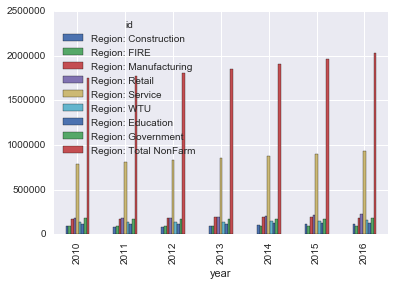

In [150]:
df_region_sec_2010.plot(kind="bar")

In [151]:
sns.set()

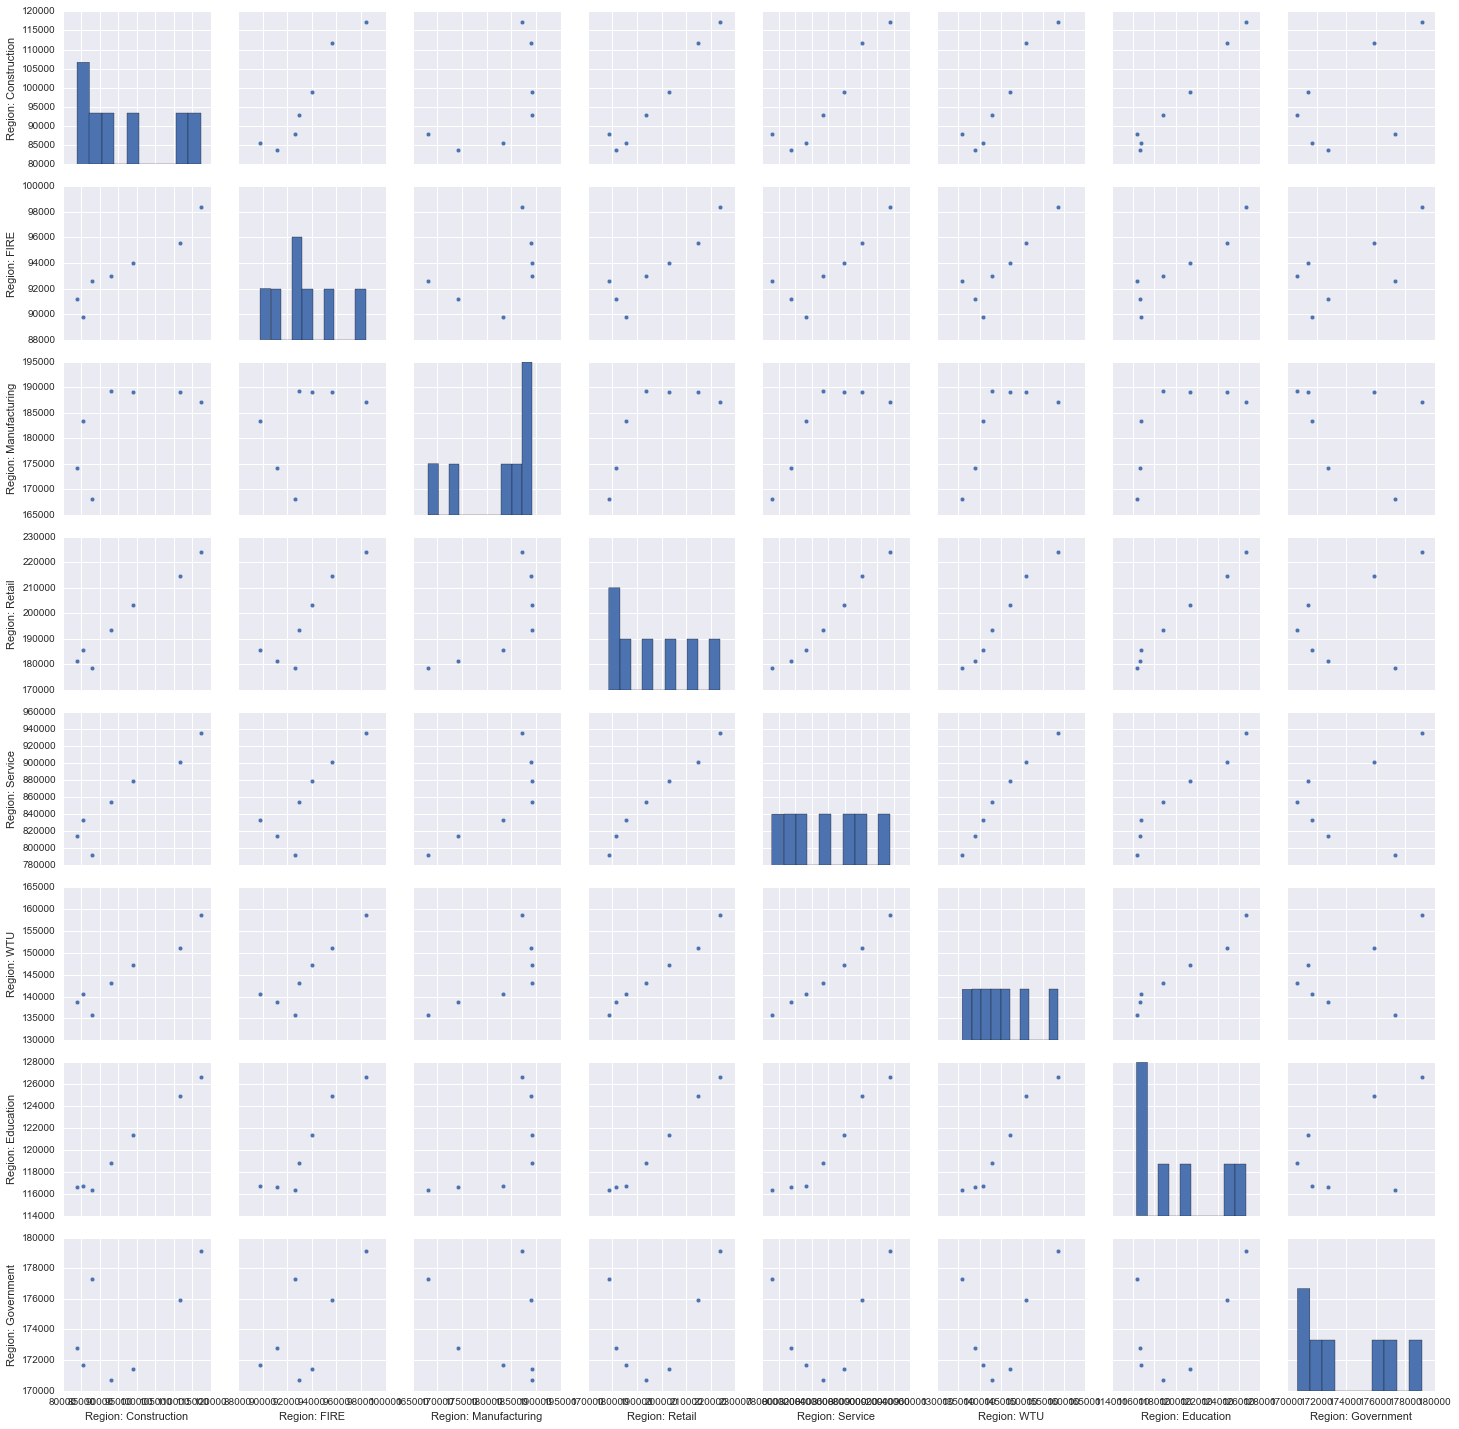

In [155]:
sns.pairplot(df_region_sec_2010[range(9)])

In [ ]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Load the example car crash dataset
crashes = sns.load_dataset(df_region_sec_2010)

#.sort_values("total", ascending=False)




In [78]:
plt.plot(df_region_sec_2010["year"],df_region_sec_2010[df_region_sec_2010.columns[2]])
plt.xlabel(str(df_region_sec_2010["year"])
plt.title('test')

SyntaxError: invalid syntax (<ipython-input-78-df26d62bad4c>, line 3)

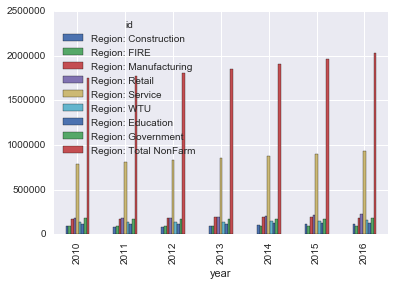

In [118]:
df_region_sec_2010.plot(kind ="bar")

In [105]:
 ts = Series(random(1000), index=date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()    

NameError: name 'random' is not defined

In [8]:
del df_sa_kin_sno
del df_sa_kit
del df_sa_pie
del df_sa_region
del df_sa_region_sector_CM
del df_sa_region_total
del df_sa_region_total_CM

In [49]:
range(29,38,1)

[29, 30, 31, 32, 33, 34, 35, 36, 37]